## Construct 2D Model for probability grid

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
def integrand(y,x,nx,ny,ii,jj):
    return (1.-x)*(1.-y)/(0.01+pow((x+ii*nx)**2.+(y+jj*ny)**2.,0.5))#+(z+kk*nz)**2.,2.))

In [12]:
def integrand3(z,y,x,nx,ny,nz):
    def middle_int(ii,jj,kk):
        return 1./(0.01+pow((x+ii*nx)**2.+(y+jj*ny)**2.+(z+kk*nz)**2.,1.))
    tmp_int = 0.
    for ii in [1.,-1.]:
        for jj in [1.,-1.]:
            for kk in [1.,-1.]:
                tmp_int+=middle_int(ii,jj,kk)
    return (1.-x)*(1.-y)*(1.-z)*tmp_int

In [13]:
nx = np.arange(0,4); ny = np.arange(0,4); nz = np.arange(0,4);
from scipy.integrate import tplquad,dblquad
prob = np.zeros([len(nx),len(ny),len(nz)])
for i,nxi in enumerate(nx):
    print(i)
    for j,nyj in enumerate(ny):
        for k,nzk in enumerate(nz):
            prob[i,j,k]=tplquad(integrand3,0,1,0,1,0,1,args=(nxi,nyj,nzk),epsrel=0.1)[0]
prob/=np.sum(prob.ravel())

0
1
2
3


In [14]:
prob_list = prob.ravel()
NX,NY,NZ=np.meshgrid(nx,ny,nz)

In [15]:
dis=np.sqrt(NX.ravel()**2.+NY.ravel()**2.+NZ.ravel()**2.)
p_ideal = 1./(0.01+dis**2.)
p_ideal/=np.sum(p_ideal)

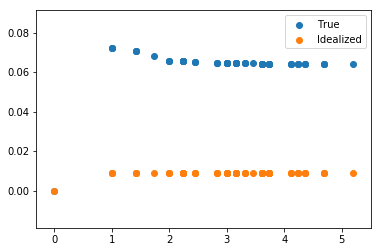

In [16]:
plt.scatter(dis,dis**2*prob_list,label='True')
plt.scatter(dis,dis**2.*p_ideal,label='Idealized')
plt.legend()

In [268]:
draw_ids = np.random.choice(range(len(p_ideal)),size=100000,p=p_ideal)
Nx_samples = NX.ravel()[draw_ids]
Ny_samples = NY.ravel()[draw_ids]
Nz_samples = NZ.ravel()[draw_ids]
dis_samples = np.sqrt(Nx_samples**2.+Ny_samples**2.+Nz_samples**2.)

In [271]:
draw_ids = np.random.choice(range(len(prob_list)),size=100000,p=prob_list)
Nx_samples = NX.ravel()[draw_ids]
Ny_samples = NY.ravel()[draw_ids]
Nz_samples = NZ.ravel()[draw_ids]
dis_samples = np.sqrt(Nx_samples**2.+Ny_samples**2.+Nz_samples**2.)

(array([0.3531844 , 0.41623105, 0.22241457, 0.155211  , 0.25563145,
        0.1557691 , 0.20480539, 0.08821912, 0.04784309, 0.02519172]),
 array([0.        , 0.51961524, 1.03923048, 1.55884573, 2.07846097,
        2.59807621, 3.11769145, 3.6373067 , 4.15692194, 4.67653718,
        5.19615242]),
 <a list of 10 Patch objects>)

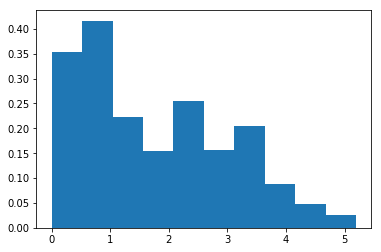

In [272]:
plt.hist(dis_samples,density=True,bins=10)

ValueError: x and y must be the same size

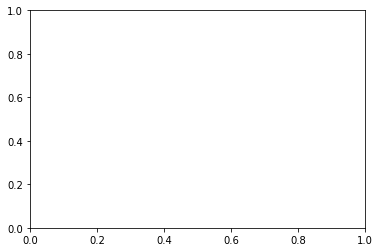

In [231]:
NX,NY=np.meshgrid(nx,ny)
dis=np.sqrt(NX**2.+NY**2.).ravel()
plt.scatter(dis,prob);
plt.ylabel('Probability')
plt.xlabel('Distance from Center');

TypeError: Input z must be at least a 2x2 array.

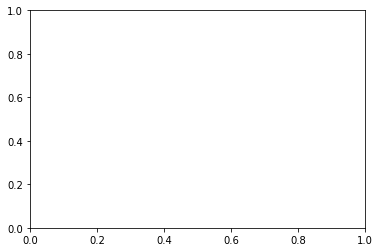

In [159]:
NX,NY=np.meshgrid(nx,ny)
plt.contourf(NX,NY,np.log10(prob.T))
plt.colorbar()

In [151]:
prob2 = (1+NX**2.+NY**2.)**(-1.)
prob2/=np.sum(prob2.ravel())

ValueError: x and y must be the same size

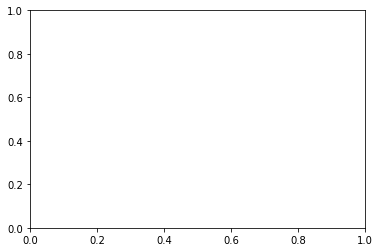

In [152]:
dis=np.sqrt(NX**2.+NY**2.)
plt.scatter(dis.ravel(),prob.ravel())

## Analytic Expressions

In [33]:
from scipy.special import dawsn,hyp1f1

In [42]:
def prob(n,a=1):
    return 2./(a*n)*dawsn(n/a)
def prob2(n,a=1):
    R = a/2.
    return 1./R**2.*np.exp(-n**2./(4.*R**2.))*hyp1f1(0.5,1.5,(n/(2.*R))**2.)

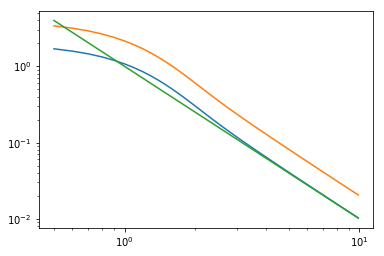

In [45]:
n = np.arange(0.5,10,0.1)
plt.plot(n,prob(n))
plt.plot(n,prob2(n))
plt.plot(n,1./n**2.)
plt.yscale('log');plt.xscale('log')

In [44]:
from scipy.special import erfi
def prob3(n,a=1):
    R = a/2.
    pref = np.exp(-n**2./(4.*R**2.))*np.sqrt(np.pi)/(2.*R*n)
    return pref*erfi(0.5*n/R)

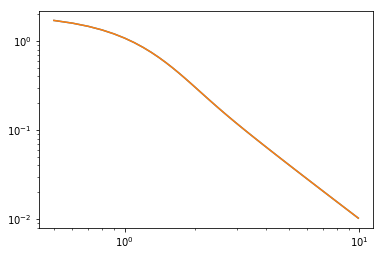

In [48]:
n = np.arange(0.5,10,0.1)
plt.plot(n,prob(n))
plt.plot(n,prob3(n))
#plt.plot(n,1./n**2.)
plt.yscale('log');plt.xscale('log')